In [19]:
# Import libraries
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;
import seaborn as sns;

In [20]:
# Import data from excel files
df1 = pd.read_excel('Formative Assessment I_class_VIII.xlsx');
df2 = pd.read_excel('Formative Assessment-2_class_VIII.xlsx');
df3 = pd.read_excel('Half Yearly Exam_class_VIII.xlsx');

# In df3, where the Full Mark is not 100, multuply the Full Mark, Pass Mark and Marks Secured by 100/Full Mark
df3.loc[df3['Full Mark']!=100, 'Pass Mark'] = df3['Pass Mark']*100/df3['Full Mark'];
df3.loc[df3['Full Mark']!=100, 'Marks Secured'] = df3['Marks Secured']*100/df3['Full Mark'];
df3.loc[df3['Full Mark']!=100, 'Full Mark'] = df3['Full Mark']*100/df3['Full Mark'];

# Merge the dataframes
df = pd.concat([df1, df2, df3], ignore_index=True);

# print the head
df.head()

,Academic session,Exam Name,Exam Mode,Subject Name,Subject Status,Full Mark,Pass Mark,Negative Percentage,Student Name,Class,Section,Roll No,Marks Secured,Result
0,2022-2023,Formative Assessment I,Offline,Maths,Evaluating,25.0,7.0,0 %,Diraj Bhuyan,VIII,A,1,18.0,Pass
1,2022-2023,Formative Assessment I,Offline,Computer,Evaluating,25.0,7.0,0 %,Diraj Bhuyan,VIII,A,1,8.0,Pass
2,2022-2023,Formative Assessment I,Offline,English II,Evaluating,25.0,7.0,0 %,Diraj Bhuyan,VIII,A,1,22.0,Pass
3,2022-2023,Formative Assessment I,Offline,Science,Evaluating,25.0,7.0,0 %,Diraj Bhuyan,VIII,A,1,16.0,Pass
4,2022-2023,Formative Assessment I,Offline,Social Science,Evaluating,25.0,7.0,0 %,Diraj Bhuyan,VIII,A,1,15.0,Pass


In [21]:
# Print the number of cells with value 0 in marks secured column
print('Number of cells with value 0 in marks secured column: ', df[df['Marks Secured']==0].shape[0])

# Print the student names with value 0 in marks secured column
print('Student names with value 0 in marks secured column: ', df[df['Marks Secured']==0]['Student Name'].unique())

Number of cells with value 0 in marks secured column:  9
Student names with value 0 in marks secured column:  ['Nisha kumari' 'Krish Biswal' 'Aditya Pandey']


In [22]:
# Get all the Subject names
subjects = df['Subject Name'].unique();

# Get all the students
students = df['Student Name'].unique();

# Get all the Exam names
exams = df['Exam Name'].unique();

In [23]:
# print the number of subjects
print('Number of Subjects: ', len(subjects));
# Print the subjects
print('Subjects: ', subjects);
# print the number of students
print('Number of Students: ', len(students));

# print the number of exams
print('Number of Exams: ', len(exams));

Number of Subjects:  7
Subjects:  ['Maths' 'Computer' 'English II' 'Science' 'Social Science' 'English I'
 'Hindi']
Number of Students:  13
Number of Exams:  3


In [24]:
# Create a new dataframe for students data
df_new = pd.DataFrame(students, columns=['Student Name']);

# Loop through all the students
for student in students:
    # Find the first row of the student in the dataframe
    row = df.loc[df['Student Name'] == student].iloc[0];
    # Add the Class, Section, Roll No to the new dataframe
    df_new.loc[df_new['Student Name'] == student, 'Class'] = row['Class'];
    df_new.loc[df_new['Student Name'] == student, 'Section'] = row['Section'];
    df_new.loc[df_new['Student Name'] == student, 'Roll No'] = row['Roll No'];

df_new.head()

,Student Name,Class,Section,Roll No
0,Diraj Bhuyan,VIII,A,1.0
1,Ankit joshi,VIII,A,2.0
2,Anish Sharma,VIII,A,3.0
3,Aditya Pandey,VIII,A,4.0
4,Jeet roy,VIII,A,5.0


In [25]:
# Add columns for each exam and subject
for exam in exams:
    for subject in subjects:
        df_new[exam + '_' + subject] = 0;
        df_new[exam + '_' + subject + '_total'] = 0;
        df_new[exam + '_' + subject + '_pass'] = 0;

df_new.head()

,Student Name,Class,Section,Roll No,Formative Assessment I_Maths,Formative Assessment I_Maths_total,Formative Assessment I_Maths_pass,Formative Assessment I_Computer,Formative Assessment I_Computer_total,Formative Assessment I_Computer_pass,...,Half Yearly Exam_Science_pass,Half Yearly Exam_Social Science,Half Yearly Exam_Social Science_total,Half Yearly Exam_Social Science_pass,Half Yearly Exam_English I,Half Yearly Exam_English I_total,Half Yearly Exam_English I_pass,Half Yearly Exam_Hindi,Half Yearly Exam_Hindi_total,Half Yearly Exam_Hindi_pass
0,Diraj Bhuyan,VIII,A,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Ankit joshi,VIII,A,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Anish Sharma,VIII,A,3.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Aditya Pandey,VIII,A,4.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Jeet roy,VIII,A,5.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
# Add marks to the new dataframe
for student in students:
    for exam in exams:
        for subject in subjects:
            # full marks
            full_mark = df.loc[(df['Exam Name'] == exam) & (df['Subject Name'] == subject), 'Full Mark'].iloc[0];
            # pass marks
            pass_mark = df.loc[(df['Exam Name'] == exam) & (df['Subject Name'] == subject), 'Pass Mark'].iloc[0];
            # Check if the row of the student esist in the dataframe
            if df.loc[(df['Student Name'] == student) & (df['Exam Name'] == exam) & (df['Subject Name'] == subject)].empty:
                # If it doesn't exist, add 0 to the new dataframe
                df_new.loc[df_new['Student Name'] == student, exam + '_' + subject] = 0;
                df_new.loc[df_new['Student Name'] == student, exam + '_' + subject + '_total'] = full_mark;
                df_new.loc[df_new['Student Name'] == student, exam + '_' + subject + '_pass'] = pass_mark;
            else:
                # If it exists, get the row
                row = df.loc[(df['Student Name'] == student) & (df['Exam Name'] == exam) & (df['Subject Name'] == subject)].iloc[0];
                # Add the marks to the new dataframe
                df_new.loc[df_new['Student Name'] == student, exam + '_' + subject] = row['Marks Secured'];
                df_new.loc[df_new['Student Name'] == student, exam + '_' + subject + '_total'] = full_mark;
                df_new.loc[df_new['Student Name'] == student, exam + '_' + subject + '_pass'] = pass_mark;
df_new.head()

,Student Name,Class,Section,Roll No,Formative Assessment I_Maths,Formative Assessment I_Maths_total,Formative Assessment I_Maths_pass,Formative Assessment I_Computer,Formative Assessment I_Computer_total,Formative Assessment I_Computer_pass,...,Half Yearly Exam_Science_pass,Half Yearly Exam_Social Science,Half Yearly Exam_Social Science_total,Half Yearly Exam_Social Science_pass,Half Yearly Exam_English I,Half Yearly Exam_English I_total,Half Yearly Exam_English I_pass,Half Yearly Exam_Hindi,Half Yearly Exam_Hindi_total,Half Yearly Exam_Hindi_pass
0,Diraj Bhuyan,VIII,A,1.0,18.0,25,7,8.0,25,7,...,30,64.0,100,30,72,100,30,67,100,30
1,Ankit joshi,VIII,A,2.0,12.0,25,7,16.0,25,7,...,30,77.0,100,30,81,100,30,90,100,30
2,Anish Sharma,VIII,A,3.0,10.0,25,7,2.0,25,7,...,30,18.5,100,30,24,100,30,48,100,30
3,Aditya Pandey,VIII,A,4.0,4.0,25,7,7.5,25,7,...,30,0.0,100,30,0,100,30,0,100,30
4,Jeet roy,VIII,A,5.0,11.0,25,7,10.0,25,7,...,30,45.0,100,30,44,100,30,47,100,30


In [27]:
# Add weightage column for each subject
for subject in subjects:
    df_new['Weightage ' + subject] = np.nan;

df_new.head()

,Student Name,Class,Section,Roll No,Formative Assessment I_Maths,Formative Assessment I_Maths_total,Formative Assessment I_Maths_pass,Formative Assessment I_Computer,Formative Assessment I_Computer_total,Formative Assessment I_Computer_pass,...,Half Yearly Exam_Hindi,Half Yearly Exam_Hindi_total,Half Yearly Exam_Hindi_pass,Weightage Maths,Weightage Computer,Weightage English II,Weightage Science,Weightage Social Science,Weightage English I,Weightage Hindi
0,Diraj Bhuyan,VIII,A,1.0,18.0,25,7,8.0,25,7,...,67,100,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Ankit joshi,VIII,A,2.0,12.0,25,7,16.0,25,7,...,90,100,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Anish Sharma,VIII,A,3.0,10.0,25,7,2.0,25,7,...,48,100,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Aditya Pandey,VIII,A,4.0,4.0,25,7,7.5,25,7,...,0,100,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Jeet roy,VIII,A,5.0,11.0,25,7,10.0,25,7,...,47,100,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
# Calculate the weightage for each subject by taking the 40% from FA1, 40% from FA2 and 80% from Half Yearly
for subject in subjects:
    df_new['Weightage ' + subject] = round(df_new['Formative Assessment I_' + subject] * 0.4 + df_new['Formative Assessment-2_' + subject] * 0.4 + df_new['Half Yearly Exam_' + subject] * 0.8, 2);
    # Calculate the full weightage for each subject by taking the 40% from FA1, 40% from FA2 and 80% from Half Yearly
    df_new['Weightage ' + subject + ' total'] = df_new['Formative Assessment I_' + subject + '_total'] * 0.4 + df_new['Formative Assessment-2_' + subject + '_total'] * 0.4 + df_new['Half Yearly Exam_' + subject + '_total'] * 0.8;

In [29]:
# Calculate the weightage result for each subject, pass if weightage is greater than 30% of the full weightage
for subject in subjects:
    # calculate the weightage result
    df_new['Result ' + subject] = np.where(df_new['Weightage ' + subject] >= df_new['Weightage ' + subject + ' total'] * 0.3, 'Pass', 'Fail');

In [30]:
# Add a total column for the weightage
df_new['Total Weightage'] = 0;

# Calculate the total weightage using a loop of all the subjects
for subject in subjects:
    df_new['Total Weightage'] += df_new['Weightage ' + subject];

df_new.head()

,Student Name,Class,Section,Roll No,Formative Assessment I_Maths,Formative Assessment I_Maths_total,Formative Assessment I_Maths_pass,Formative Assessment I_Computer,Formative Assessment I_Computer_total,Formative Assessment I_Computer_pass,...,Weightage English I total,Weightage Hindi total,Result Maths,Result Computer,Result English II,Result Science,Result Social Science,Result English I,Result Hindi,Total Weightage
0,Diraj Bhuyan,VIII,A,1.0,18.0,25,7,8.0,25,7,...,100.0,100.0,Pass,Pass,Pass,Pass,Pass,Pass,Pass,421.2
1,Ankit joshi,VIII,A,2.0,12.0,25,7,16.0,25,7,...,100.0,100.0,Pass,Pass,Pass,Pass,Pass,Pass,Pass,541.0
2,Anish Sharma,VIII,A,3.0,10.0,25,7,2.0,25,7,...,100.0,100.0,Fail,Fail,Pass,Fail,Fail,Fail,Pass,177.0
3,Aditya Pandey,VIII,A,4.0,4.0,25,7,7.5,25,7,...,100.0,100.0,Fail,Fail,Fail,Fail,Fail,Fail,Fail,41.6
4,Jeet roy,VIII,A,5.0,11.0,25,7,10.0,25,7,...,100.0,100.0,Fail,Pass,Pass,Pass,Pass,Pass,Pass,299.6


In [31]:
# Add a result column
df_new['Result'] = '';

# Function to add all weightage subject total
def add_total_weightage(row):
    total = 0;
    for subject in subjects:
        total += row['Weightage ' + subject + ' total'];
    return total;


# Add the total marks column
df_new['Total Marks'] = df_new.apply(add_total_weightage, axis=1);

# Calculate the percentage
df_new['Percentage'] = df_new['Total Weightage'] / df_new['Total Marks'] * 100;

# Pass if total weightage is greater than 30% of total full marks
df_new.loc[df_new['Total Weightage'] >= df_new['Total Marks'] * 0.3, 'Result'] = 'Pass';

# Fail if total weightage is less than 30% of total full marks
df_new.loc[df_new['Total Weightage'] < df_new['Total Marks'] * 0.3, 'Result'] = 'Fail';

In [32]:
# Calculate the rank
df_new['Rank'] = df_new['Percentage'].rank(ascending=False);

In [33]:
# Print the first row
df_new.iloc[0]

Student Name                    Diraj Bhuyan
Class                                   VIII
Section                                    A
Roll No                                  1.0
Formative Assessment I_Maths            18.0
                                    ...     
Total Weightage                        421.2
Result                                  Pass
Total Marks                            700.0
Percentage                         60.171429
Rank                                     4.0
Name: 0, Length: 93, dtype: object

In [34]:
df_new

,Student Name,Class,Section,Roll No,Formative Assessment I_Maths,Formative Assessment I_Maths_total,Formative Assessment I_Maths_pass,Formative Assessment I_Computer,Formative Assessment I_Computer_total,Formative Assessment I_Computer_pass,...,Result English II,Result Science,Result Social Science,Result English I,Result Hindi,Total Weightage,Result,Total Marks,Percentage,Rank
0,Diraj Bhuyan,VIII,A,1.0,18.0,25,7,8.0,25,7,...,Pass,Pass,Pass,Pass,Pass,421.2,Pass,700.0,60.171429,4.0
1,Ankit joshi,VIII,A,2.0,12.0,25,7,16.0,25,7,...,Pass,Pass,Pass,Pass,Pass,541.0,Pass,700.0,77.285714,1.0
2,Anish Sharma,VIII,A,3.0,10.0,25,7,2.0,25,7,...,Pass,Fail,Fail,Fail,Pass,177.0,Fail,700.0,25.285714,9.0
3,Aditya Pandey,VIII,A,4.0,4.0,25,7,7.5,25,7,...,Fail,Fail,Fail,Fail,Fail,41.6,Fail,700.0,5.942857,13.0
4,Jeet roy,VIII,A,5.0,11.0,25,7,10.0,25,7,...,Pass,Pass,Pass,Pass,Pass,299.6,Pass,700.0,42.800000,7.0
5,Khusboo kumri,VIII,A,6.0,5.0,25,7,7.5,25,7,...,Pass,Pass,Pass,Pass,Pass,350.0,Pass,700.0,50.000000,6.0
6,Nisha kumari,VIII,A,8.0,0.0,25,7,3.0,25,7,...,Fail,Fail,Fail,Fail,Pass,148.2,Fail,700.0,21.171429,10.0
7,Kashish bansal,VIII,A,10.0,21.0,25,7,7.0,25,7,...,Pass,Pass,Pass,Pass,Pass,415.0,Pass,700.0,59.285714,5.0
8,Clement Marak,VIII,A,11.0,1.0,25,7,1.0,25,7,...,Fail,Fail,Fail,Fail,Fail,83.4,Fail,700.0,11.914286,12.0
9,Niraj Kumar,VIII,A,12.0,17.5,25,7,12.0,25,7,...,Pass,Pass,Pass,Pass,Pass,484.4,Pass,700.0,69.200000,3.0


In [35]:
# Export the dataframe to excel
df_new.to_excel('Result.xlsx', index=False);

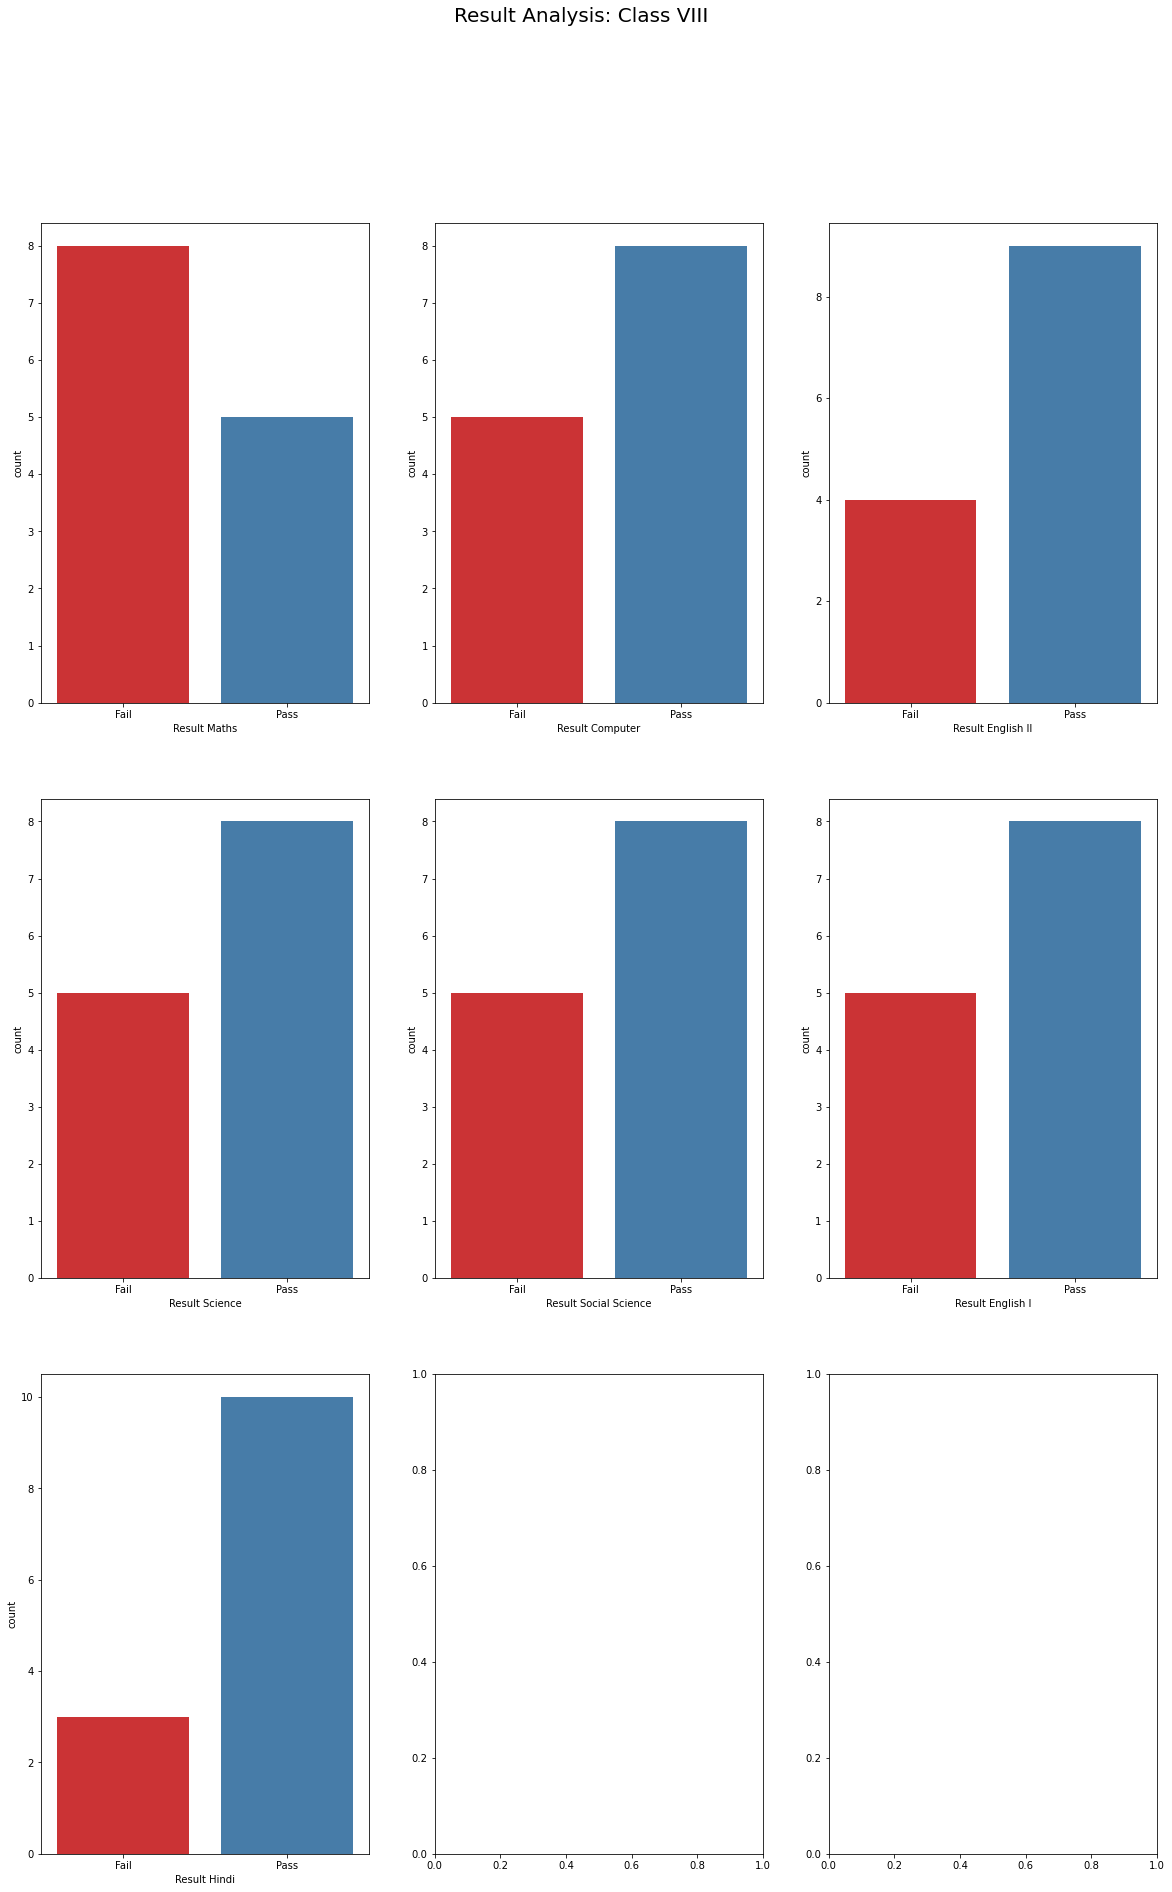

In [36]:
# Combine the charts in one figure
fig, axes = plt.subplots(3, 3, figsize=(20, 30));

# Set the title of the figure
fig.suptitle('Result Analysis: Class VIII', fontsize=20);

for i, subject in enumerate(subjects):
    sns.countplot(x='Result ' + subject, data=df_new, palette='Set1', order=['Fail', 'Pass'], ax=axes[i // 3, i % 3]);
plt.show();